<center><font size="6">IPM para Ecuador basado en Nájera</font></center>

Ejercicio aplicado a datos de Ecuador basado en: https://github.com/hectornajera83/Taller-quito

Notebook realizado en Jupyter con Kernel de R: IRkernel

In [27]:
rm(list=ls())

In [58]:
#Librerias para IRT, Alpha de Cronbach y Omega
library("psych")
library("ltm")
#Librería para Latent Variable Analysis
library("lavaan")
#Para importar información desde Stata
library('readstata13')
#Para manejo de bases de datos (abajo dplyr)
library('data.table')
#Para usar pipes
library("magrittr")

In [29]:
#Directorio de bases de datos (bdd) de encuestas Ecuador
    #A veces mejor setear directorio que un proyecto (?)
dir = "C:/Users/dvill/Desktop/MT/Taller Najera/Data"
setwd(dir)

In [30]:
##Cargo información de ENEMDU diciembre 2018
#Prefiero no trabajar con factores, aún falta mejoras para su uso en R (?)
#Tengo 3 bdd:
    #1) matriz de información de ENEMDU diciembre 2018: enem18dic (data.table)
    #2) matriz con detalle de variables de enem18dic: enem18dic.var.labels (data.table)
    #3) lista de información de etiquetas de valores de variables: 
        # enem18dic.val.labels (lista R-base)

en18dic = fread(file = "enem18dic.csv")
en18dic.var.labels = fread( file = "enem18dic.var.labels.csv")
en18dic.val.labels = readRDS(file = "enem18dic.val.labels.RDS")

In [31]:
head(en18dic.var.labels)

VarName,VarLabel
<chr>,<chr>
id_upm,Identificador de la unidad primaria de muestreo
id_viv,Identificador de vivienda
id_hogar,Identificador del hogar
id_per,Identificador de la persona
area,area
ciudad,ciudad


In [33]:
#En diciembre 2018 se levantaron 59 mil encuestas
dim(en18dic)

[1] 59350   427

In [34]:
#Lista de variables candidatas para IPM
vars = "dim1_ind1_h dim1_ind2_h dim1_ind3_h dim2_ind1_h dim2_ind2_h 
        dim2_ind3_h dim3_ind1_h dim3_ind2_h dim4_ind1_h dim4_ind2_h 
        dim4_ind3_h dim4_ind4_h"
vars = vars %>% strsplit(split = " ") %>% unlist
vars = vars[vars %in% c("\n", "")==F]

# Confiabilidad

## Análisis Factorial Exploratorio

### Exploración de variables propuestas

In [104]:
res1 = data.frame("VarLab" = NA, "mean" = NA, "w.mean" = NA)
#loops en R <3
i = 0
for (x in vars){
    i = i + 1
    res1[i,"VarLab"] = en18dic.var.labels[VarName == x, VarLabel]
    res1[i,"mean"] = en18dic[, mean(get(x))]
    res1[i,"w.mean"] = en18dic[, weighted.mean(get(x), fexp)] #sin summarize
}
res1

VarLab,mean,w.mean
<chr>,<dbl>,<dbl>
Inasistencia a educaciÃ³n general bÃ¡sica y bachillerato -nivel de hogar,0.10805392,0.12811452
VulneraciÃ³n del acceso a educaciÃ³n superior -nivel de hogar,0.08439764,0.08064356
Logro educativo incompleto -nivel de hogar,0.54766639,0.57179540
Empleo infantil y adolescente -nivel de hogar,0.06638585,0.07682566
Desempleo y empleo inadecuado -nivel de hogar,0.69405223,0.69559640
No contribuciÃ³n al sistema de pensiones -nivel de hogar,0.66424600,0.68181382
Pobreza extrema por ingresos -nivel de hogar,0.07127211,0.08349788
Hogares sin provisiÃ³n de agua por red pÃºblica -nivel de hogar,0.21590564,0.21382864
Personas en condiciÃ³n de hacinamiento -nivel de hogar,0.13039596,0.16728352


Acá el objetivo es encontrar variables que potencialmente tengan prevalencias poco intuitivas. Este es un ejercicio subjetivo

###	Alpha de Cronbach 

In [105]:
alpha1<-psych::alpha(en18dic[,mget(vars)])

In [106]:
#Alpha total para conjunto de variables propuesto
    #Reliability analysis 
alpha1$total

raw_alpha,std.alpha,G6(smc),average_r,S/N,ase,mean,sd,median_r
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.7132027,0.7070646,0.715708,0.16746,2.413722,0.001668119,0.2869615,0.1912352,0.1571697


Los valores de Alpha recomendados son XXXX, según XXXX. Este indicador tiene debilidades, siempre se recomienda profundizar con el análisis del indicador Omega.

In [107]:
#Alpha total para conjunto de variables propuesto
    #Reliability if an item is dropped
alpha1$alpha.drop

,raw_alpha,std.alpha,G6(smc),average_r,S/N,alpha se,var.r,med.r
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
dim1_ind1_h,0.7059350,0.6978981,0.7037743,0.1735625,2.310141,0.001713868,0.010382162,0.1653083
dim1_ind2_h,0.7205153,0.7226378,0.7277772,0.1914972,2.605394,0.001650879,0.007889410,0.1673545
dim1_ind3_h,0.6784367,0.6746547,0.6845662,0.1586134,2.073657,0.001888858,0.010459241,0.1407375
dim2_ind1_h,0.7015845,0.6911956,0.6983986,0.1690773,2.238296,0.001744849,0.010731996,0.1574396
dim2_ind2_h,0.6851860,0.6814128,0.6845692,0.1627888,2.138859,0.001834308,0.009757477,0.1568998
dim2_ind3_h,0.7033710,0.6958411,0.6976880,0.1721702,2.287755,0.001717750,0.009397127,0.1653083
dim3_ind1_h,0.7022749,0.6935633,0.7034902,0.1706448,2.263316,0.001742410,0.011255602,0.1431168
dim3_ind2_h,0.6795186,0.6730502,0.6731709,0.1576415,2.058573,0.001863801,0.007354594,0.1521943
dim4_ind1_h,0.6990778,0.6911010,0.6998233,0.1690151,2.237304,0.001750441,0.011232718,0.1574396


Se puede considerar que las variables que al ser removidas reducen "muy poco" (cuanto es muy poco?) a Alpha, son redudantes y ayudan poco a comprender la variable latente.

### Item Response Theory - IRT de 2 parámetros

In [108]:
rel_irt<-ltm::ltm(en18dic[,mget(vars)] ~ z1)

In [109]:
irtC = rel_irt$coefficients  %>% data.table
irtC = irtC  %>% setnames("(Intercept)", "Intercept")
irtC[, VarName := vars]
irtC

Intercept,z1,VarName
<dbl>,<dbl>,<chr>
-2.4634266,0.9963838,dim1_ind1_h
-2.4579136,0.4254302,dim1_ind2_h
0.2646775,1.5494915,dim1_ind3_h
-3.6229075,1.6441192,dim2_ind1_h
1.1220191,1.4406508,dim2_ind2_h
0.7943118,0.8925539,dim2_ind3_h
-3.4240290,1.5361891,dim3_ind1_h
-2.2309780,2.2365091,dim3_ind2_h
-2.3299460,1.1597437,dim4_ind1_h


En el contexto de IRT z1 es discriminación, el intercepto representa severidad. Una buena regla de dedo según XXXXX viene a ser:
* Discriminación menor a 0.9 significa que el indicador representa muy poco de la variable latente, se puede considerar sacar al indicador
* Severidad mayor a 3 o menor a -3 significa que el indicador es "tan severo" que aporta poco a nuestra comprensión de la variable latente, se puede considerar sacar al indicador

In [110]:
#Variables "malas" según severidad
irtC[abs(Intercept)>3, VarName]

[1] "dim2_ind1_h" "dim3_ind1_h"

In [111]:
#Variables "malas" según discriminación
irtC[z1<0.9, VarName]

[1] "dim1_ind2_h" "dim2_ind3_h"

### Estimador Omega

In [124]:
o0<-psych::omega(en18dic[,mget(vars)], plot = F)

In [125]:
o0.i = list("Omega Total" = o0$omega.tot, "Omega Jerárquico" = o0$omega_h)
o0.i

$`Omega Total`
[1] 0.7534756

$`Omega Jerárquico`
[1] 0.4297045

Se considera un Omega "bueno", cuando este es mayor a 0.9. Se comprueba la necesidad de este valor en las simulaciones propuestas por Nájera (XXXX).

### Estructura factorial ideal dados los datos

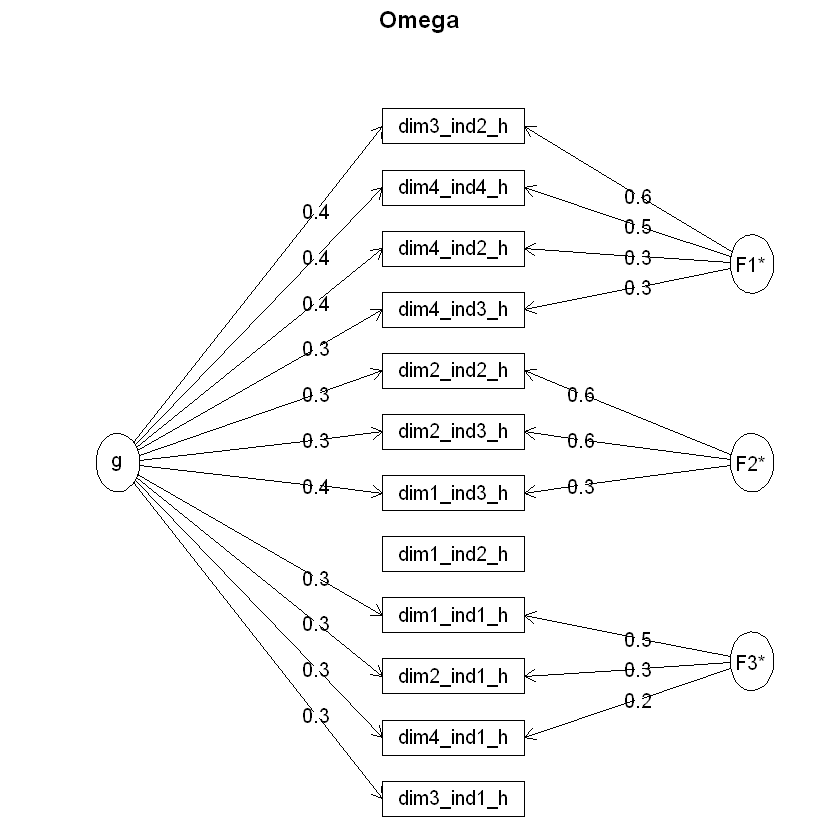

In [114]:
o0<-psych::omega(en18dic[,mget(vars)], plot = T)

La función omega del paquete `psych` tambien permite conocer cual sería la estructura factorial ideal dado los datos que se proponen. 

Cuando se encuentra que la estructura ideal presentada difiere a la estructura del índice propuesto por alguna otra metodología se puede pensar en replantear dicho índice.

### Buscar un mejor índice

En base a los anteriores criterios de confiabilidad se propone un nuevo índice.

Se quitarán variables con discriminación menor a 0.9, -3>severidad>3 y cambio de alpha al ser retirado muy pequeño.

In [115]:
#Discriminación
out_vars = c()
out_vars = c(out_vars, irtC[z1<0.9, VarName])
#Severidad
out_vars = c(out_vars, irtC[abs(Intercept)>3, VarName])
#Alpha
tmp1 = alpha1$alpha.drop  %>%  data.table
tmp1[, VarName := vars]
tmp1[, diff.a := raw_alpha - alpha1[[1]][[1]]]
tmp1[, .(raw_alpha, VarName, diff.a)]
out.a = tmp1[diff.a>=-0.01 & diff.a<0, VarName]
out_vars = c(out_vars, out.a) 

raw_alpha,VarName,diff.a
<dbl>,<chr>,<dbl>
0.7059350,dim1_ind1_h,-0.007267708
0.7205153,dim1_ind2_h,0.007312511
0.6784367,dim1_ind3_h,-0.034766001
0.7015845,dim2_ind1_h,-0.011618274
0.6851860,dim2_ind2_h,-0.028016775
0.7033710,dim2_ind3_h,-0.009831729
0.7022749,dim3_ind1_h,-0.010927888
0.6795186,dim3_ind2_h,-0.033684138
0.6990778,dim4_ind1_h,-0.014124907


In [116]:
#Total variables a reducirse
out_vars  %>% unique  %>% length
#se repiten por criterios?
out_vars  %>% length
#Quienes?
out_vars = out_vars  %>% unique
out_vars

[1] 5

[1] 6

[1] "dim1_ind2_h" "dim2_ind3_h" "dim2_ind1_h" "dim3_ind1_h" "dim1_ind1_h"

"Mejor" conjunto de variables

In [117]:
vars2 = vars[vars %in% out_vars == F]

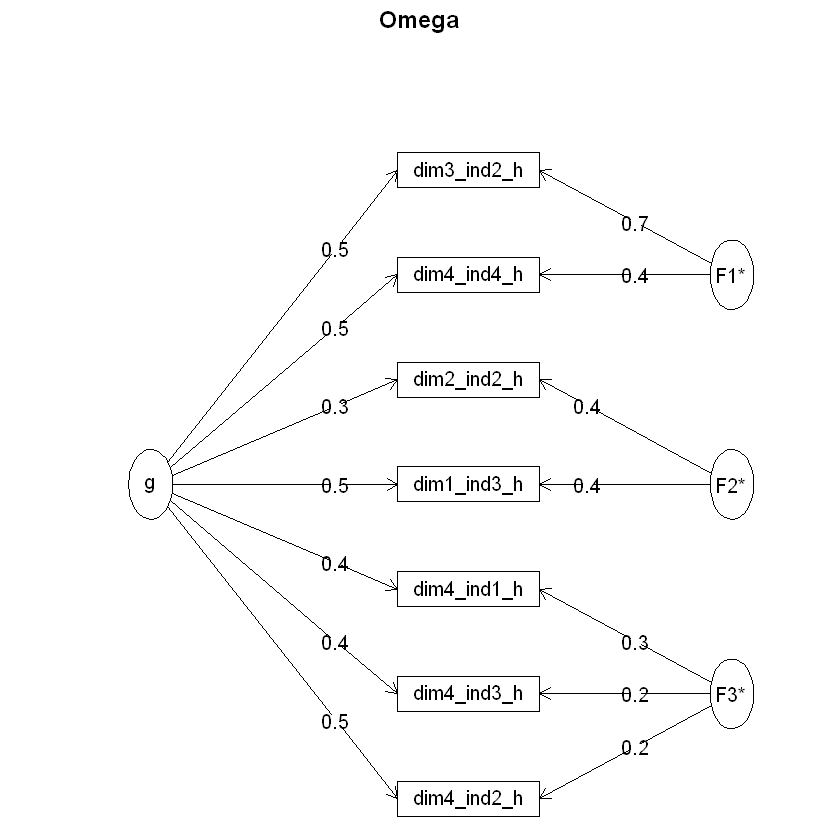

In [118]:
o1<-psych::omega(en18dic[,mget(vars2)], plot = T)

In [126]:
o1.i = list("Omega Total" = o1$omega.tot, "Omega Jerárquico" = o1$omega_h)
#anterior
o0.i
#Nuevo
o1.i

$`Omega Total`
[1] 0.7534756

$`Omega Jerárquico`
[1] 0.4297045

$`Omega Total`
[1] 0.7429226

$`Omega Jerárquico`
[1] 0.5568172

In [127]:
alpha2<-psych::alpha(en18dic[,mget(vars2)])
#Anterior
alpha1$total
#Nuevo
alpha2$total

raw_alpha,std.alpha,G6(smc),average_r,S/N,ase,mean,sd,median_r
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.7132027,0.7070646,0.715708,0.16746,2.413722,0.001668119,0.2869615,0.1912352,0.1571697


raw_alpha,std.alpha,G6(smc),average_r,S/N,ase,mean,sd,median_r
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.6897498,0.6903572,0.6764703,0.2415646,2.229527,0.001912199,0.3498833,0.2546066,0.2339443


In [ ]:
#En general se encuentra muy poca mejora

## Análisis confirmatorio

Ya que se encuentra poca mejoría con el nuevo índice propuesto, se hará análisis confirmatorio de los dos modelos propuestos por Omega

### Con todas las variables

In [190]:
#Función para extraer ecuación de omega óptimo
opt.o.extract.eq = function(omega){
    o0.s = omega$schmid$sl %>% data.table() 

    o0.s[,VarName := omega$schmid$sl  %>% rownames]

    n0 = names(o0.s) 
    n0 = n0[names(o0.s)  %>% grepl(pattern = "F")]
    n1 = substr(n0,1,(nchar(n0)-1))
    o0.s = setnames(o0.s, old = n0, new=n1)

    Fs = list()
    h = c()
    for (x in n1){
        Fs[[x]] = o0.s[abs(get(x))>0.2, VarName]
        Fs[[x]] = Fs[[x]] %>% paste(collapse = " + ")
        h = c(h, Fs[[x]])
        Fs[[x]] = paste0(x," =~  + " , Fs[[x]])
    }
    h = h %>% paste(collapse = " + ")
    h = paste0("h"," =~  + " , h)
    Fs = Fs  %>% unlist  %>% paste(collapse = " \n ")
    opt.o.eq = paste0(h, " \n ", Fs) 
    return(opt.o.eq)
}

In [192]:
#Añado paths entre dimensiones
opt.o.eq = paste0(opt.o.extract.eq(o0), "
                h  ~~ 0*F1 
                h  ~~ 0*F2 
                h  ~~ 0*F3 
                F1 ~~ 0*F2 
                F2 ~~ 0*F3 
                F1 ~~ 0*F3")
opt.o.eq

[1] "h =~  + dim3_ind2_h + dim4_ind2_h + dim4_ind3_h + dim4_ind4_h + dim1_ind3_h + dim2_ind2_h + dim2_ind3_h + dim1_ind1_h + dim2_ind1_h + dim4_ind1_h \n F1 =~  + dim3_ind2_h + dim4_ind2_h + dim4_ind3_h + dim4_ind4_h \n F2 =~  + dim1_ind3_h + dim2_ind2_h + dim2_ind3_h \n F3 =~  + dim1_ind1_h + dim2_ind1_h + dim4_ind1_h\n                h  ~~ 0*F1 \n                h  ~~ 0*F2 \n                h  ~~ 0*F3 \n                F1 ~~ 0*F2 \n                F2 ~~ 0*F3 \n                F1 ~~ 0*F3"

In [193]:
fit <- lavaan::sem(opt.o.eq, data = en18dic,
           ordered=vars)

Warning message in lavaan::lavaan(model = opt.o.eq, data = en18dic, ordered = vars, :
"lavaan WARNING: the optimizer warns that a solution has NOT been found!"

In [201]:
lambdas<-as.data.frame(fit@Model@GLIST$lambda)
error<-colSums(fit@Model@GLIST$theta)
Slambda_2<-sum(lambdas[1])^2 + sum(lambdas[2])^2 + 
           sum(lambdas[3])^2 + sum(lambdas[4])^2
error <- sum(error)

omega_t <- Slambda_2 / (Slambda_2+error)
omega_h <- sum(lambdas[1])^2 / (Slambda_2+error)
omegamanual<-c(omega_h=omega_h,omega_t=omega_t)
lambdas
error
omegamanual

V1,V2,V3,V4
<dbl>,<dbl>,<dbl>,<dbl>
1.0000000,1.0000000,0.0000000,0.0000000
0.9393270,0.7351558,0.0000000,0.0000000
0.8330115,0.0000000,1.0000000,0.0000000
0.6608722,0.0000000,0.5370961,0.0000000
0.6397349,0.0000000,0.0000000,1.0000000
1.0031202,0.0000000,0.0000000,0.1890674
0.8561810,0.0000000,0.0000000,0.1651309


[1] 2.60102

omega_h   omega_t 
0.7820370 0.9421994

El modelo propuesto con los datos no sirve. Se buscará algún otro subconjunto

### Subconjunto 1

In [199]:
#Añado paths entre dimensiones
opt.o.eq = paste0(opt.o.extract.eq(o1), "
                h  ~~ 0*F1 
                h  ~~ 0*F2 
                h  ~~ 0*F3 
                F1 ~~ 0*F2 
                F2 ~~ 0*F3 
                F1 ~~ 0*F3")
opt.o.eq

[1] "h =~  + dim3_ind2_h + dim4_ind4_h + dim1_ind3_h + dim2_ind2_h + dim4_ind1_h + dim4_ind2_h + dim4_ind3_h \n F1 =~  + dim3_ind2_h + dim4_ind4_h \n F2 =~  + dim1_ind3_h + dim2_ind2_h \n F3 =~  + dim4_ind1_h + dim4_ind2_h + dim4_ind3_h\n                h  ~~ 0*F1 \n                h  ~~ 0*F2 \n                h  ~~ 0*F3 \n                F1 ~~ 0*F2 \n                F2 ~~ 0*F3 \n                F1 ~~ 0*F3"

In [200]:
fit <- lavaan::sem(opt.o.eq, data = en18dic,
           ordered=vars2)

Warning message in lav_model_vcov(lavmodel = lavmodel, lavsamplestats = lavsamplestats, :
"lavaan WARNING:
    Could not compute standard errors! The information matrix could
    not be inverted. This may be a symptom that the model is not
    identified."Warning message in lav_test_satorra_bentler(lavobject = NULL, lavsamplestats = lavsamplestats, :
"lavaan WARNING: could not invert information matrix
"

In [202]:
lambdas<-as.data.frame(fit@Model@GLIST$lambda)
error<-colSums(fit@Model@GLIST$theta)
Slambda_2<-sum(lambdas[1])^2 + sum(lambdas[2])^2 + 
           sum(lambdas[3])^2 + sum(lambdas[4])^2
error <- sum(error)

omega_t <- Slambda_2 / (Slambda_2+error)
omega_h <- sum(lambdas[1])^2 / (Slambda_2+error)
omegamanual<-c(omega_h=omega_h,omega_t=omega_t)
lambdas
error
omegamanual

V1,V2,V3,V4
<dbl>,<dbl>,<dbl>,<dbl>
1.0000000,1.0000000,0.0000000,0.0000000
0.9393270,0.7351558,0.0000000,0.0000000
0.8330115,0.0000000,1.0000000,0.0000000
0.6608722,0.0000000,0.5370961,0.0000000
0.6397349,0.0000000,0.0000000,1.0000000
1.0031202,0.0000000,0.0000000,0.1890674
0.8561810,0.0000000,0.0000000,0.1651309


[1] 2.60102

omega_h   omega_t 
0.7820370 0.9421994

Los omegas están decentes, al menos el total, las cargas factoriales deberían ser mayores a 0.5. Habrá que hacer más investigación.